# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.lines as tline
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = merged_data.drop_duplicates(['Mouse ID','Timepoint'])
clean_data_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_data_mice['Mouse ID'].nunique()
clean_num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_data_mice.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_statistics = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
# Assemble the resulting series into a single summary DataFrame.
summary_statistics 


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'STD', 'SEM']
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Rows')

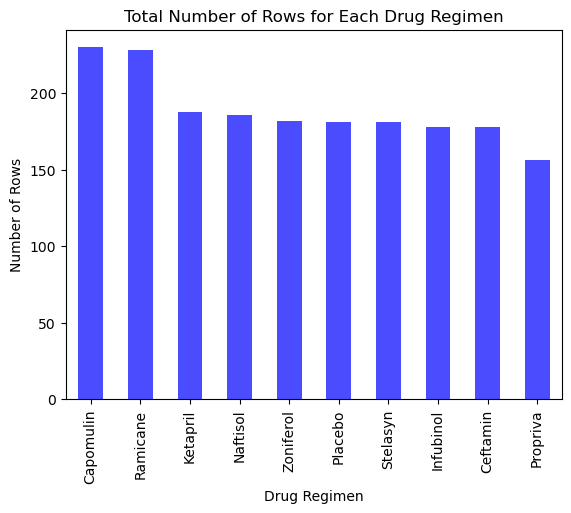

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data_mice['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')


Text(0, 0.5, '# of Observed Mouse Timepoints')

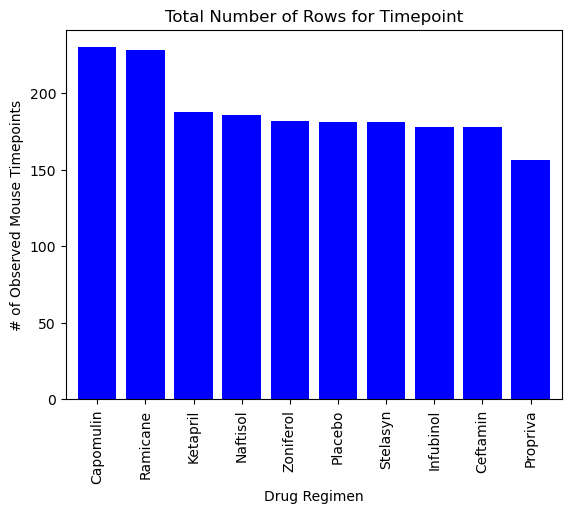

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data_mice['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue', width=0.8)
plt.title('Total Number of Rows for Timepoint')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

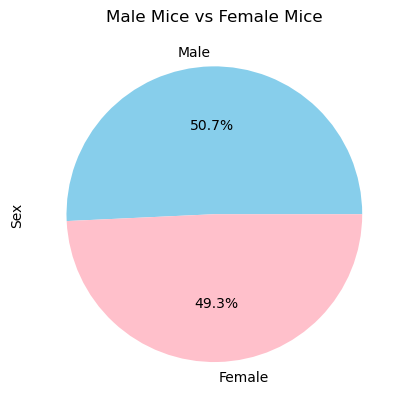

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data_mice['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct = '%1.1f%%', colors=['skyBlue', 'pink'])

#Title
plt.ylabel('Sex')
plt.title("Male Mice vs Female Mice")

#Show Plot
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_data = clean_data_mice[clean_data_mice['Drug Regimen'].isin(target_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = final_tumor_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints.reset_index(), final_tumor_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimens

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in target_regimens:
    regimen_data = clean_data_mice[clean_data_mice['Drug Regimen'] == regimen]
    
    # Find the last timepoint for each mouse in the current regimen
    last_timepoints = regimen_data.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge the last timepoints with the original data to get the corresponding tumor volume
    final_tumor_volume = pd.merge(last_timepoints.reset_index(), regimen_data, on=['Mouse ID', 'Timepoint'], how='left')
    
    # Append the final tumor volume data for the current regimen to the list
    final_tumor_volumes.append(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i, regimen in enumerate(target_regimens):
    regimen_data = final_tumor_volumes[i]
    
regimen_outliers = {}

# Function to determine outliers based on upper and lower bounds
def determine_outliers(data):
    q1 = data['Tumor Volume (mm3)'].quantile(0.25)
    q3 = data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return outliers

# Loop through each treatment regimen
for i, regimen in enumerate(target_regimens):
    # Get the final tumor volume data for the current regimen
    regimen_data = final_tumor_volumes[i]
    
    # Determine outliers for the current regimen
    outliers = determine_outliers(regimen_data)
    
    # Store outliers in the dictionary
    regimen_outliers[regimen] = outliers

# Display the dictionary with outliers
for regimen, outliers in regimen_outliers.items():
    print(f"\nOutliers for {regimen}:")
    print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])

final_tumor_volumes



Outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

Outliers for Ramicane:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

Outliers for Infubinol:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

Outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


[   Mouse ID Drug Regimen  Tumor Volume (mm3)
 0      b128    Capomulin           38.982878
 1      b742    Capomulin           38.939633
 2      f966    Capomulin           30.485985
 3      g288    Capomulin           37.074024
 4      g316    Capomulin           40.159220
 5      i557    Capomulin           47.685963
 6      i738    Capomulin           37.311846
 7      j119    Capomulin           38.125164
 8      j246    Capomulin           38.753265
 9      l509    Capomulin           41.483008
 10     l897    Capomulin           38.846876
 11     m601    Capomulin           28.430964
 12     m957    Capomulin           33.329098
 13     r157    Capomulin           46.539206
 14     r554    Capomulin           32.377357
 15     r944    Capomulin           41.581521
 16     s185    Capomulin           23.343598
 17     s710    Capomulin           40.728578
 18     t565    Capomulin           34.455298
 19     u364    Capomulin           31.023923
 20     v923    Capomulin         

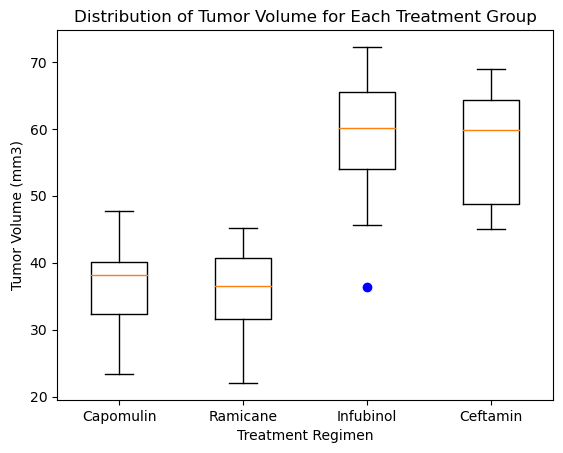

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# List of specified treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store tumor volume data for each regimen
tumor_volume_data = []

# Loop through each treatment regimen
for regimen in target_regimens:
    # Get the final tumor volume data for the current regimen
    regimen_data = final_tumor_volumes[target_regimens.index(regimen)]['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volume_data.append(regimen_data)

# Create a box plot
plt.boxplot(tumor_volume_data, labels=target_regimens, notch=False, sym='bo')

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

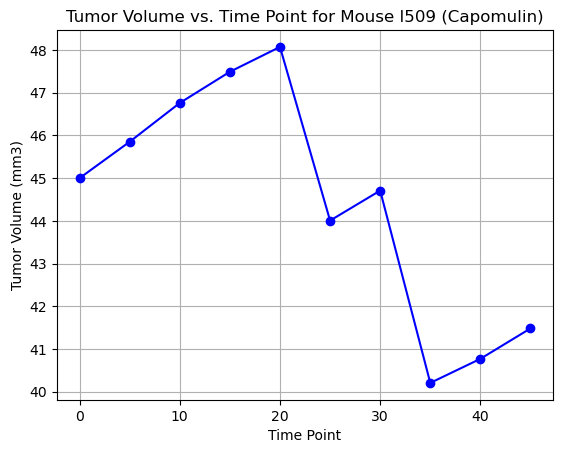

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse ID treated with Capomulin
selected_mouse_id = 'l509'  # Replace with the actual mouse ID this is an 'L509'

# Filter data for the selected mouse and Capomulin regimen
selected_mouse_data = clean_data_mice[(clean_data_mice['Drug Regimen'] == 'Capomulin') & (clean_data_mice['Mouse ID'] == selected_mouse_id)]

# Create a line plot
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

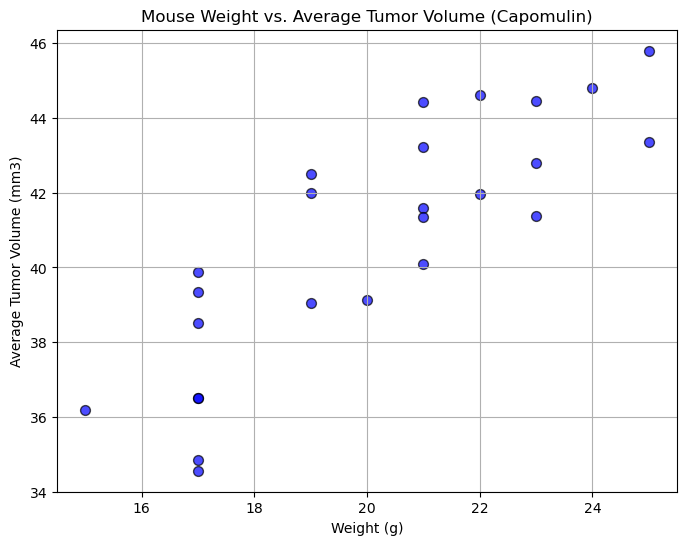

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_mice[clean_data_mice['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(average_tumor_volume.reset_index(), mouse_metadata, on='Mouse ID', how='left')

# Create a scatter plot
plt.figure(figsize=(8, 6))
mouse_weight_sp = plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', edgecolors='black', s=50, alpha=0.7)

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show(mouse_weight_sp)

## Correlation and Regression

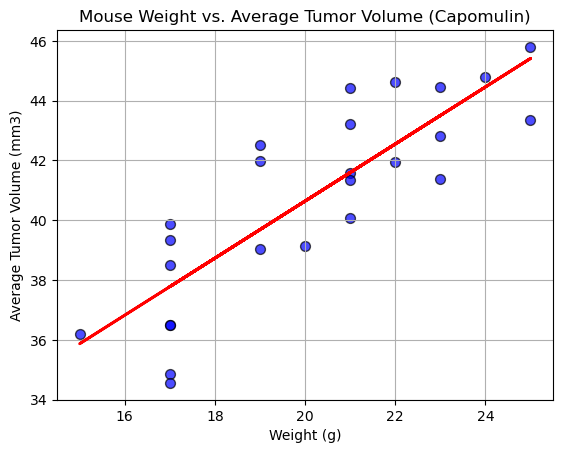

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse metadata to get weights
merged_data = pd.merge(average_tumor_volume.reset_index(), mouse_metadata, on='Mouse ID', how='left')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', edgecolors='black', s=50, alpha=0.7)



# Plot the linear regression line
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red', linewidth=2)

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()




